In [6]:
import keras
import numpy as np
import time
import warnings

from eigenpro import kernels
from eigenpro import mnist
from eigenpro import ciphar
from eigenpro import synthetic
from eigenpro import utils
from eigenpro import training

/home/johannes/seminar/kernel-overfitting/eigenpro/training.py:44: Warning: 

EigenPro-tensorflow has been tested with Keras 2.0.8. If the
current version (2.2.4) fails, switch to 2.0.8 by command,

	pip install Keras==2.0.8


  '\tpip install Keras==2.0.8\n\n' %(keras.__version__), Warning)


In [8]:
### Dataset

dataset_dict = {}

num_classes = 10
(x_train_full, y_train_full), (x_test_full, y_test_full) = mnist.load()
y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
dataset_dict['MNIST'] = dataset

# num_classes = 10
# (x_train_full, y_train_full), (x_test_full, y_test_full) = ciphar.load()
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['CIPHAR'] = dataset

# num_classes = 2
# (x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(1)
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['Synthetic1'] = dataset

# num_classes = 2
# (x_train_full, y_train_full), (x_test_full, y_test_full) = synthetic.load(2)
# y_train_full = keras.utils.to_categorical(y_train_full, num_classes)
# y_test_full = keras.utils.to_categorical(y_test_full, num_classes)
# dataset = ((x_train_full, y_train_full), (x_test_full, y_test_full))
# dataset_dict['Synthetic2'] = dataset

Load MNIST dataset.
60000 train samples
10000 test samples


'20190516-100648'

In [9]:
### Kernel

kernel_dict = {}

s = 5
kernel_sgd = lambda x,y: kernels.Gaussian(x, y, s)
kernel_inv = lambda x,y: training.Gaussian(x, y, s)
kernel_dict["Gaussian"] = (kernel_sgd, kernel_inv)


### Size 

size_list = [200, 400]
# size_list = [2000, 4000, 10000, 20000, 40000, 60000]



### Noise

noise_list = [0, 10]


### Training

trainers = training.training(dataset_dict, kernel_dict, size_list, noise_list)

with open('output/figure234-' + time.strftime("%Y%m%d-%H%M%S") + '.txt', 'w') as f:
    print(trainers, file=f)

D:MNIST K:Gaussian S:200 N:0
Instructions for updating:
Colocations handled automatically by placer.
SVD time: 0.42, Eigenvalue ratio: 102.62
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
indexed-feat- (InputLayer)   (None, 785)               0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 784)               0         
_________________________________________________________________
kernel_embedding_2 (KernelEm (None, 200)               156800    
_________________________________________________________________
trainable (Dense)            (None, 10)                2000      
Total params: 158,800
Trainable params: 2,000
Non-trainable params: 156,800
_________________________________________________________________

Stochastic Gradient Descent
Instructions for updating:
Use tf.cast instead.
train error: 1.00%	test error: 29.33% (1 epoc

FileNotFoundError: [Errno 2] No such file or directory: '../output/figure234-20190516-100821.txt'

In [10]:
# trainers = eval(open('figure234.txt', 'r').read())
# trainers

MNIST


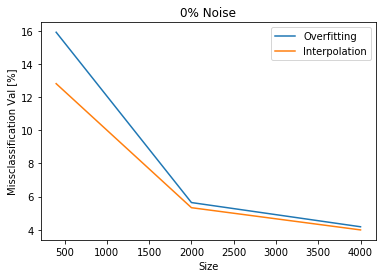

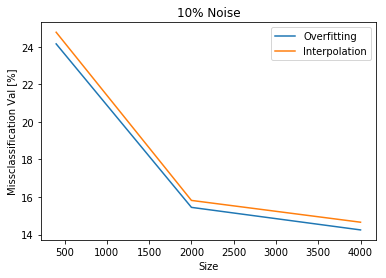

In [8]:
# Size vs Error

import matplotlib.pyplot as plt

this_kernel = 'Gaussian'

for this_dataset in dataset_dict.keys():
    
    print(this_dataset)
    
    for this_noise in noise_list:

        size = []
        inv = []
        sgd = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            if trainer['noise'] != this_noise:
                continue

            sgd.append(trainer['sgd_ce'] * 100)
            inv.append(trainer['inv_ce'] * 100)
            size.append(trainer['size'])

        plt.plot(size, sgd, label='Overfitting') 
        plt.plot(size, inv, label='Interpolation')    

        plt.title(str(this_noise) + '% Noise')
        plt.xlabel('Size')
        plt.ylabel('Missclassification Val [%]')
        plt.legend(loc='upper right')
        plt.show()

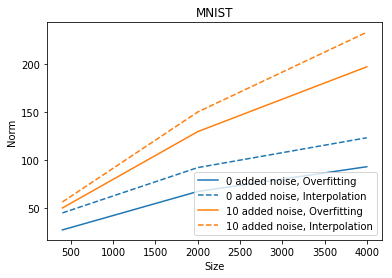

In [10]:
# Size vs Norm

import matplotlib.pyplot as plt
ax = plt.gca()

this_kernel = 'Gaussian'

for this_dataset in dataset_dict.keys():
    
    ax.set_prop_cycle(None)

    for this_noise in noise_list:

        size = []
        inv = []
        sgd = []

        for name, trainer in trainers.items():  

            if trainer['dataset'] != this_dataset:
                continue

            if trainer['kernel'] != this_kernel:
                continue

            if trainer['noise'] != this_noise:
                continue

            sgd.append(trainer['sgd_norm'])
            inv.append(trainer['inv_norm'])
            size.append(trainer['size'])

        color = next(ax._get_lines.prop_cycler)['color']
        plt.plot(size, sgd, label=str(this_noise) + ' added noise, Overfitting', color=color) 
        plt.plot(size, inv, '--', label=str(this_noise) + ' added noise, Interpolation', color=color)    

    plt.title(this_dataset)
    plt.xlabel('Size')
    plt.ylabel('Norm')
    plt.legend(loc='lower right')
    plt.show()

In [7]:
# del trainers